# Aviation Accident Data Analysis

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

___
**Reading the data using pandas read_csv**

Dataset link: https://www.kaggle.com/khsamaha/aviation-accident-database-synopses

In [2]:
#Read data from csv
dataset = pd.read_csv("C:\Projects\Datasets\AviationData.csv", encoding="ISO-8859-1")


___
**We display sample rows from the dataset**

In [3]:
dataset

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,NaN,NaN,...,Ferry,NaN,2.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
1,2.02102E+13,Accident,ERA21FA130,2021-02-15,"St Thomas, CB",United States,18.354444,-65.027778,NaN,NaN,...,Aobv,Caribbean Buzz Management Llc.,4.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
2,2.02102E+13,Accident,ANC21LA017,2021-02-13,"TYONEK, AK",United States,61.336392,-152.016430,NaN,NaN,...,Personal,Paul Andrews,0.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN
3,2.02102E+13,Accident,CEN21LA127,2021-02-12,"PRAIRIE DU SAC, WI",United States,43.297731,-89.755693,91C,SAUK-PRAIRIE,...,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN
4,2.02102E+13,Accident,ERA21LA131,2021-02-10,"LAKE PLACID, FL",United States,27.243723,-81.413767,09FA,NaN,...,Personal,Case Robert,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85971,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,NaN,VMC,Approach,Probable Cause,16-04-1980
85972,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
85973,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
85974,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996



___
**To get the details about the column we use pandas .info() method**

**We can find the Accident.Number field doesn't have in missing/null values**

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85976 entries, 0 to 85975
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                85976 non-null  object 
 1   Investigation.Type      85963 non-null  object 
 2   Accident.Number         85976 non-null  object 
 3   Event.Date              85976 non-null  object 
 4   LOCATION                85898 non-null  object 
 5   Country                 85469 non-null  object 
 6   Latitude                31587 non-null  float64
 7   Longitude               31578 non-null  float64
 8   Airport.Code            48612 non-null  object 
 9   Airport.Name            51298 non-null  object 
 10  Injury.Severity         85842 non-null  object 
 11  Aircraft.damage         83047 non-null  object 
 12  Aircraft.Category       29226 non-null  object 
 13  Registration.Number     81756 non-null  object 
 14  Make                    85908 non-null

___
**We check the datatype of the 'Event.Date' columns is str, we need to convert it to pandas timestamp object**

In [5]:
print(dataset['Event.Date'][0])
print(type(dataset['Event.Date'][0]))

2021-02-16
<class 'str'>


In [6]:
dataset['Event.Date'] = dataset['Event.Date'].apply(
        lambda x: pd.Timestamp(x))
dataset

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,NaN,NaN,...,Ferry,NaN,2.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
1,2.02102E+13,Accident,ERA21FA130,2021-02-15,"St Thomas, CB",United States,18.354444,-65.027778,NaN,NaN,...,Aobv,Caribbean Buzz Management Llc.,4.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
2,2.02102E+13,Accident,ANC21LA017,2021-02-13,"TYONEK, AK",United States,61.336392,-152.016430,NaN,NaN,...,Personal,Paul Andrews,0.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN
3,2.02102E+13,Accident,CEN21LA127,2021-02-12,"PRAIRIE DU SAC, WI",United States,43.297731,-89.755693,91C,SAUK-PRAIRIE,...,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN
4,2.02102E+13,Accident,ERA21LA131,2021-02-10,"LAKE PLACID, FL",United States,27.243723,-81.413767,09FA,NaN,...,Personal,Case Robert,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85971,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,NaN,VMC,Approach,Probable Cause,16-04-1980
85972,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
85973,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
85974,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996


In [7]:
#Now the 'Event.Date' is converted into type pandas timestamp
print(dataset['Event.Date'][0])
print(type(dataset['Event.Date'][0]))

2021-02-16 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>



___
**Now we set 'Event.Date' column as index**

In [8]:
dataset.set_index('Event.Date', inplace=True)


___
**After that we short the data set by the index**

In [9]:
dataset.sort_index(inplace=True)
dataset

,Event.Id,Investigation.Type,Accident.Number,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Date,,,,,,,,,,,,,,,,,,,,,
1948-10-24,20001218X45444,Accident,SEA87LA080,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1962-07-19,20001218X45447,Accident,LAX94LA336,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
1974-08-30,20061025X01555,Accident,NYC07LA005,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
1977-06-19,20001218X45448,Accident,LAX96LA321,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
1979-08-02,20041105X01764,Accident,CHI79FA064,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,2.0,NaN,NaN,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-10,2.02102E+13,Accident,ERA21LA131,"LAKE PLACID, FL",United States,27.243723,-81.413767,09FA,NaN,Minor,...,Personal,Case Robert,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
2021-02-12,2.02102E+13,Accident,CEN21LA127,"PRAIRIE DU SAC, WI",United States,43.297731,-89.755693,91C,SAUK-PRAIRIE,Non-Fatal,...,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN
2021-02-13,2.02102E+13,Accident,ANC21LA017,"TYONEK, AK",United States,61.336392,-152.016430,NaN,NaN,Minor,...,Personal,Paul Andrews,0.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN



___
**We groupby the dataset by 'Investigation.Type'**

**95.72% of this events are type Accident, whereas 4.27% are of type Incident**

**We visualize the same with a pie plot**

In [10]:
dataset.groupby('Investigation.Type').count()['Accident.Number']

Investigation.Type
Accident    82286
Incident     3677
Name: Accident.Number, dtype: int64

In [11]:
print('Accident:', 82286/(82286+3677)*100 ,'%')
print('Incident:', 3677/(82286+3677)*100 ,'%')

Accident: 95.72257831857893 %
Incident: 4.277421681421076 %


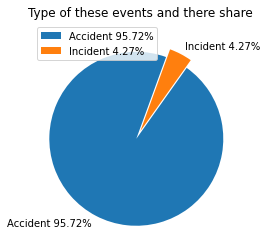

In [72]:
plt.pie([82286/(82286+3677)*100, 3677/(82286+3677)*100], labels=['Accident 95.72%','Incident 4.27%'], explode=[0.1, 0], startangle=70)
plt.title('Type of these events and there share')
plt.legend(loc='upper left')


___
**Now we get the yearly count of the accidents using the pandas DataFrame.groupby() and pandas.Grouper() method**

**Then we plot the data using pandas builtin plot() method**

**From Below  plot we can find that plost 1980 there's a spike in the number of accidents**

In [13]:
dataset.groupby(pd.Grouper(freq='Y')).count()['Accident.Number']

Event.Date
1948-12-31       1
1949-12-31       0
1950-12-31       0
1951-12-31       0
1952-12-31       0
              ... 
2017-12-31    1658
2018-12-31    1704
2019-12-31    1639
2020-12-31    1257
2021-12-31      62
Freq: A-DEC, Name: Accident.Number, Length: 74, dtype: int64

Text(0.5, 1.0, 'Number of accidents over the Year')

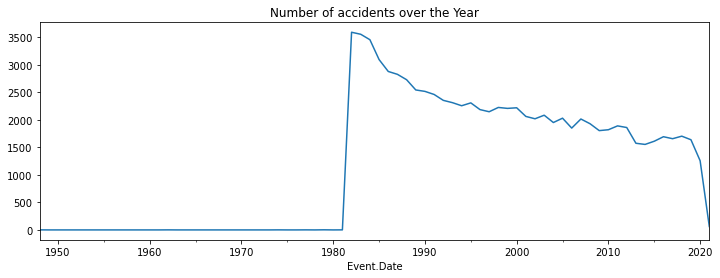

In [73]:
plt.figure(figsize=(12,4))
dataset.groupby(pd.Grouper(freq='Y')).count()['Accident.Number'].plot()
plt.title('Number of accidents over the Year')


___
**Now we findout the top 10 countries where the number of accidents/incidents happen for the data from 1948 to 2021**

**We get Canada, Mexico, Brazil, UK taking the top 5, positions here and USA securing the top place leaving other by far**

In [15]:
dataset.groupby('Country').count()['Accident.Number'].sort_values(ascending=False).head(10)

Country
United States     80132
Canada              318
Mexico              309
Brazil              305
United Kingdom      282
Australia           277
France              209
Bahamas             208
Germany             194
Colombia            163
Name: Accident.Number, dtype: int64

**We visualize the same with a barplot for the data in recent years i.e. 2000 to 2020

Text(0.5, 1.0, 'Top 10 Countries with Most Aviation Accidents')

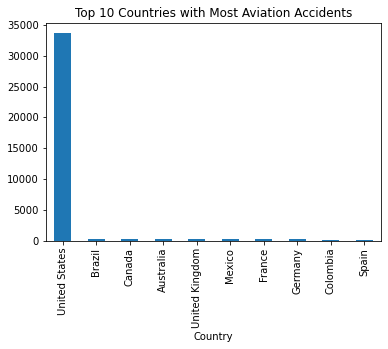

In [74]:
dataset.loc['2000-01-01':'2021-01-01'].groupby('Country').count()['Accident.Number'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Countries with Most Aviation Accidents')

**We plot yearly count of Fatal, Serious, Minor type of Injuries below together to find a corelation**

**It is clear that the order of Fatal > Serious > Minor Injuries is maintained over the years**

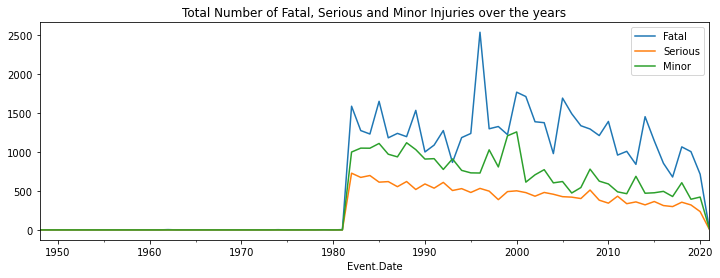

In [78]:
plt.figure(figsize=(12,4))
dataset['Total.Fatal.Injuries'].groupby(pd.Grouper(freq='Y')).sum().plot(label='Fatal')
dataset['Total.Serious.Injuries'].groupby(pd.Grouper(freq='Y')).sum().plot(label='Serious')
dataset['Total.Minor.Injuries'].groupby(pd.Grouper(freq='Y')).sum().plot(label='Minor')
plt.title('Total Number of Fatal, Serious and Minor Injuries over the years')
plt.legend(labels=['Fatal','Serious','Minor'])


___
**We find the top counties with most Fatal.Injuries**

**Then we plot them using pandas builtin pieplot**

**For that we will create another dataframe with the values for top 10 Countries + Other Countries(Remaining) with most 'Total.Fatal.Injuries' compute their percentage**

**We will convert the counts into percentage and thus will visualize with a pie chart**

In [18]:
byCountry = dataset[['Country','Total.Fatal.Injuries']].groupby('Country').sum().sort_values(by='Total.Fatal.Injuries',ascending=False)
byCountry

,Total.Fatal.Injuries
Country,
United States,29729.0
Brazil,1197.0
India,968.0
Canada,909.0
Indonesia,831.0
...,...
Niger,0.0
Bangladesh,0.0
Swaziland,0.0


In [19]:
byCountry['Percentage'] = byCountry['Total.Fatal.Injuries'].apply(lambda x: (x/byCountry['Total.Fatal.Injuries'].sum())*100)
byCountry

,Total.Fatal.Injuries,Percentage
Country,,
United States,29729.0,61.075273
Brazil,1197.0,2.459117
India,968.0,1.988660
Canada,909.0,1.867450
Indonesia,831.0,1.707207
...,...,...
Niger,0.0,0.000000
Bangladesh,0.0,0.000000
Swaziland,0.0,0.000000


In [20]:
otherCountries = byCountry['Percentage'].tail(175).sum()
byCountry = byCountry.head(10)
byCountry.loc['Other Countries'] = [otherCountries, (otherCountries/byCountry['Total.Fatal.Injuries'].sum())*100]
byCountry

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Total.Fatal.Injuries,Percentage
Country,,
United States,29729.000000,61.075273
Brazil,1197.000000,2.459117
India,968.000000,1.988660
Canada,909.000000,1.867450
Indonesia,831.000000,1.707207
France,794.000000,1.631194
Russia,764.000000,1.569562
Colombia,693.000000,1.423700
Mexico,618.000000,1.269620


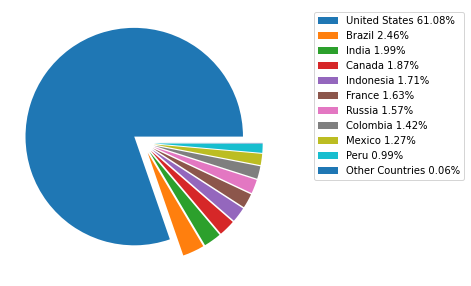

In [92]:
#Creating the labels for the pie plot
labels = byCountry.reset_index()['Country']+ ' '+byCountry.reset_index()['Percentage'].round(2).astype(str) + '%'
labels
plt.figure(figsize=(5,5))
plt.pie(byCountry['Percentage'], labels = ['']*11,  explode= [.1]*11)
plt.legend(labels=labels, loc='upper right', bbox_to_anchor=(1,1,.7,0))


___
**Now we plot the top 10 coutries leaving USA, where Brazil, India, Canada, Indonesia shares close to 50%**

<Figure size 1440x360 with 0 Axes>

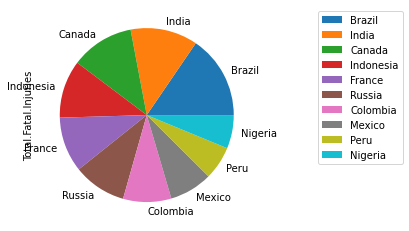

In [90]:
plt.figure(figsize=(20,5))
dataset[['Country','Total.Fatal.Injuries']][dataset['Country'] != 'United States'].groupby('Country').sum().sort_values(by='Total.Fatal.Injuries',ascending=False).head(10).plot(kind='pie', subplots=True)
plt.legend(loc='best', bbox_to_anchor=(1.7, 0., 0, 1))


___
**Now we group by these events by Aircraft's Number of Engines', and plot them with plot**

**We can clearly notice the majority of this accidents are caused for the Aircrafts with Single Engines, and the number of accidents gradually decreases as the number of Engines increases,
this clearly depicts the survivability of an aircraft very much depends on it's number engines**

In [57]:
byNoOfEngines['Percentage'] = byNoOfEngines['Accident Count']/byNoOfEngines['Accident Count'].sum()*100
byNoOfEngines['Percentage'] = byNoOfEngines['Percentage'].round(2).astype(str) + '%'
byNoOfEngines.rename(index={0.0:'Other'}, inplace=True)
byNoOfEngines

,Accident Count,Percentage
Number.of.Engines,,
8,1,0.0%
4,428,0.53%
3,481,0.6%
Other,1182,1.47%
2,10793,13.42%
1,67514,83.97%


In [63]:
labels= byNoOfEngines.reset_index()['Number.of.Engines'].astype(str)+' Engines  '+byNoOfEngines.reset_index()['Percentage']
labels

0         8 Engines  0.0%
1        4 Engines  0.53%
2         3 Engines  0.6%
3    Other Engines  1.47%
4       2 Engines  13.42%
5       1 Engines  83.97%
dtype: object

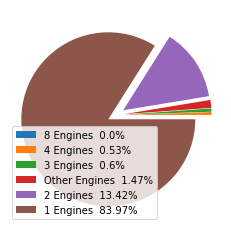

In [64]:
plt.pie(byNoOfEngines['Accident Count'], explode=[.1]*6)
plt.title('Percentage of')
plt.legend(labels=labels)